In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

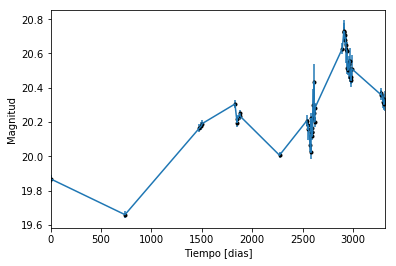

In [2]:
data = np.genfromtxt('LC_22611_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

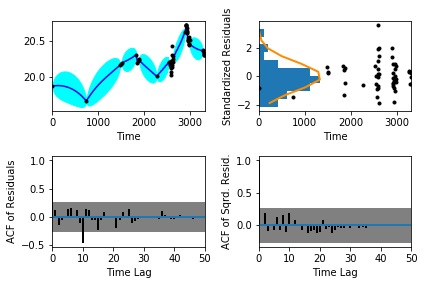

In [5]:
sample.assess_fit()

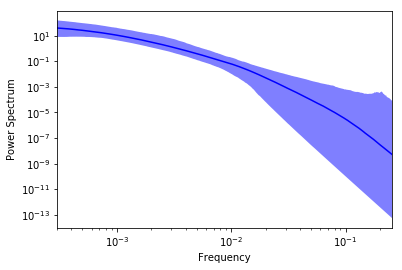

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.153116,'Medida del nivel de ruido')

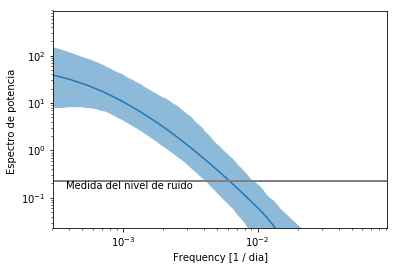

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

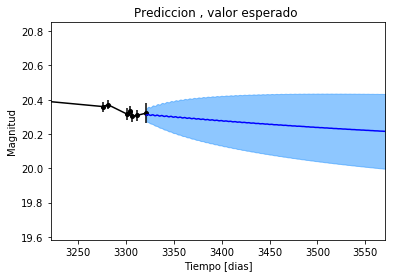

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

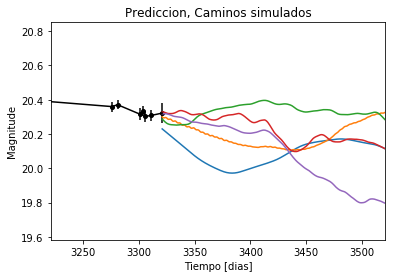

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


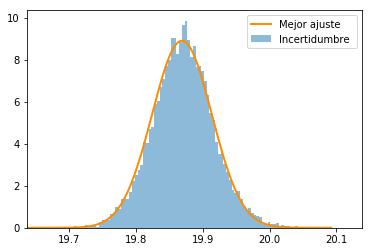

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

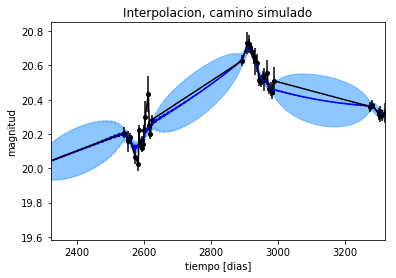

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

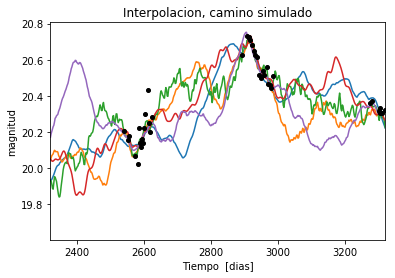

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 573.442822601
Median: 0.0184460747267
Standard deviation: 0.108749625011
68% credibility interval: [ 0.00217424  0.14732296]
95% credibility interval: [ 0.00044274  0.41692413]
99% credibility interval: [  3.30052161e-04   4.96148303e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 456.408620792
Median: 0.00580765655335
Standard deviation: 0.0484591929944
68% credibility interval: [ 0.00063952  0.03609267]
95% credibility interval: [ 0.00033296  0.16476231]
99% credibility interval: [  3.05707003e-04   3.22562264e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 379.215417293
Median: 0.0178420371618
Standard deviation:

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 441.695194229
Median: 84.3764658509
Standard deviation: 1.85825916445
68% credibility interval: [ 82.29839925  85.76710595]
95% credibility interval: [ 79.56468117  86.53593157]
99% credibility interval: [ 77.50427168  87.02042046]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 461.36173306
Median: 0.528792025705
Standard deviation: 1.16296294069
68% credibility interval: [ 0.08993924  2.3575036 ]
95% credibility interval: [ 0.02068438  3.94376201]
99% credibility interval: [ 0.01216398  5.00886203]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 692.786908175
Median: 0.510524108673
Standard deviation: 2.39220794611
68% credibility interval: [ 0.03315469  3.57201253]
95% credibility interval: [  3.95936930e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 17637.1545133
Median: 1.08594885953e-44
Standard deviation: 2.57144102713e+127
68% credibility interval: [  2.35000326e-70   2.64931294e-19]
95% credibility interval: [  9.63953473e-118   1.76103397e-001]
99% credibility interval: [  1.11489299e-127   8.73229658e+117]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3058.77047875
Median: 20.113139706
Standard deviation: 0.147519139972
68% credibility interval: [ 19.97642319  20.24294892]
95% credibility interval: [ 19.80679231  20.39481072]
99% credibility interval: [ 19.65254679  20.52354805]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 397.862410282
Median: 0.0178480814794
Standard deviation: 0.137083135394
68% credibility interval: [ 0.          0.25491221]
95% credibility interval: [ 0.          0.45606233]
99% credibility interval: [ 0.          0.49317388]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 397.862410282
Median: 0.0178480814794
Standard deviation: 0.137083135394
68% credibility interval: [ 0.          0.25491221]
95% credibility interval: [ 0.          0.45606233]
99% credibility interval: [ 0.          0.49317388]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1892.28416157
Median: 0.0
Standard deviation: 0.000409244904287
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 441.695194229
Median: 84.3764658509
Standard deviation: 1.85825916445
68% credibility interval: [ 82.29839925  85.76710595]
95% credibility interval: [ 79.56468117  86.53593157]
99% credibility interval: [ 77.50427168  87.02042046]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1695.09779193
Median: 0.0837134084065
Standard deviation: 0.0815552906843
68% credibility interval: [ 0.05295636  0.14746322]
95% credibility interval: [ 0.03623085  0.27860708]
99% credibility interval: [ 0.02971829  0.45638888]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1733.92666883
Median: 1.15101199499
Standard deviation: 0.198658764213
68% credibility interval: [ 0.97548193  1.36082018]
95% credibility interval: [ 0.82371463  1.60328393]
99% credibility interval: [ 0.73189705  1.76366686]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 286.549392816
Median: 0.000585188436664
Standard deviation: 0.0137370296246
68% credibility interval: [  2.66777504e-05   7.54066382e-03]
95% credibility interval: [  7.85901909e-07   3.71558042e-02]
99% credibility interval: [  9.20882534e-122   8.28363971e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 573.442822601
Median: (-0.115900105698+0j)
Standard deviation: 1.09943655067
68% credibility interval: [-0.92565747+0.j         -0.01366118-0.09153295j]
95% credibility interval: [-2.61961156+0.j         -0.00278180-1.16532698j]
99% credibility interval: [ -3.11739172e+00+0.j         -2.07377889e-03-1.3627747j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 456.408620792
Median: (-0.0364905823252+0j)
Standard deviation: 0.913551795219
68% credibility interval: [-0.22677694+0.60790969j -0.00401822+0.06906929j]
95% credibility interval: [-1.03523216+3.0628985j -0.00209202+2.5273934j]
99% credibility interval: [ -2.02671848e+00+1.14184583j  -1.92081375e-03+0.j        ]
Posterior summary for parameter ar_roots  element 2
